<a href="https://colab.research.google.com/github/CNU-Jiho-Jeong/Data-analysis-lecture/blob/main/%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 신경망은 퍼셉트론(Perceptron) 으로부터 출발한다.
- 생물 신경 구조를 본 따 만든 모델
- 단일로는 선형적인 모델밖에 안된다.

2. 퍼셉트론을 여러 개 나열한 것이 Neural Network(신경망)이다.
- 이것이 바로 딥 러닝 모델이다.
- 비선형적 모델 제작 가능

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# step function으로 activation function 만들기!

def step(value):
  if value>=0:
    return 1
  else:
    return 0



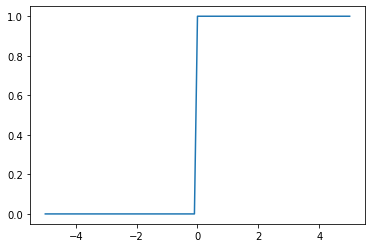

In [4]:
x = np.linspace(-5,5,101)
y = [step(k) for k in x] # 이러한 표현에도 익숙해지기

plt.plot(x,y)

In [5]:
# perceptron 제작하기

def perceptron(x1, x2, w1, w2, b, activation_function):
  result = w1*x1 + w2*x2 + b
  return activation_function(result)

### 활성화 함수
- 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라고 한다.
- 입력 신호의 총합이 활성화를 일으키는지를 정하는 역할
- 신경망의 활성화 함수는 비선형 함수를 사용해야 한다. 신경망에서 선형 함수를 이용하면 신경망의 층을 깊게하는 의미가 없어진다.(활성화 함수를 사용하지 않아도 신경망의 층을 깊게 하는 의미가 없어진다.)
### 그러니까 층을 쌓기 위해서는 비선형 함수인 활성화 함수를 사용해야 하고, 활성화 함수로는 비선형 함수를 사용해야 한다.

- 활성화 함수로 쓸 수 있는 함수로 시그모이드 함수가 있다(카.공 프로젝트 때 사용). 이 함수는 기울기 소멸 문제가 발생한다는 단점이 있다(lstm의 핵심요소들은 이 문제를 방지할 수 있다. 카공 프로젝트 참고)



In [6]:
# AND gate

w1 = 0.7
w2 = 0.7
b = -1

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1, x2, perceptron(x1, x2, w1, w2, b, step))) # step 함수를 활성화 함수로!


x = (0, 0), result = 0
x = (0, 1), result = 0
x = (1, 0), result = 0
x = (1, 1), result = 1


In [7]:
# OR gate

w1 = 1.2
w2 = 1.2
b = -1

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1,x2,perceptron(x1,x2,w1,w2,b,step)))

x = (0, 0), result = 0
x = (0, 1), result = 1
x = (1, 0), result = 1
x = (1, 1), result = 1


In [8]:
# NAND gate

w1 = -0.5
w2 = -0.5
b = 0.9

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1,x2,perceptron(x1,x2,w1,w2,b,step)))


x = (0, 0), result = 1
x = (0, 1), result = 1
x = (1, 0), result = 1
x = (1, 1), result = 0


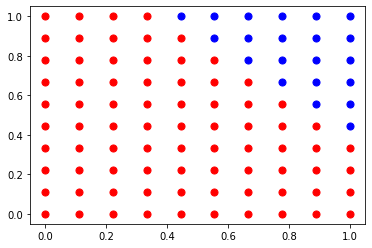

In [9]:
# 시각화를 한번 해보자!


w1 = 0.7
w2 = 0.7
b = -1

X1 = np.linspace(0, 1, 10)
X2 = np.linspace(0, 1, 10)

for x1 in X1:
  for x2 in X2:
    result = perceptron(x1, x2, w1, w2, b, step)

    if result == 0:
      color = 'red' # 거짓
    else:
      color = 'blue' # 참
    
    plt.scatter(x1, x2, color = color, s = 50)

직관적으로 나타난다

In [10]:
# XOR gate: 배타적 논리합(排他的論理合, exclusive or)은 수리 논리학에서 주어진 2개의 명제 가운데 1개만 참일 경우를 판단하는 논리 연산

w1 = -0.5
w2 = -0.5
b = 0.9

for x1 in range(2):
  for x2 in range(2):
    print("x = ({}, {}), result = {}".format(x1, x2, perceptron(x1, x2, w1, w2, b, step)))


# 당연히 Single layer로는 절대 할 수 없다!!

x = (0, 0), result = 1
x = (0, 1), result = 1
x = (1, 0), result = 1
x = (1, 1), result = 0


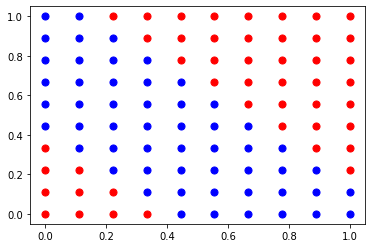

In [11]:
# Multi layer perceptron

X1 = np.linspace(0, 1, 10)
X2 = np.linspace(0, 1, 10)

w1_11, w1_12, w1_21, w1_22 = 1, 1, 1, 1
b1_1, b1_2 = -0.4, -1.2

w2_1, w2_2 = 0.5, -0.2
b2_1 = -0.4

for x1 in X1:
  for x2 in X2:
    y1 = perceptron(x1, x2, w1_11, w1_21, b1_1, step)
    y2 = perceptron(x1, x2, w1_12, w1_22, b1_2, step)

    result = perceptron(y1, y2, w2_1, w2_2, b2_1, step)

    if result == 0:
      color = 'red'
    else: 
      color = 'blue'

    plt.scatter(x1, x2, color = color, s = 50)

In [12]:
# Mnist 데이터 실습
# 파이썬에서 deep learning은 tensorflow 패키지 이용

import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [13]:
# 1. 데이터 준비

(X_train, y_train), (X_test, y_test) = mnist.load_data()
train_size, train_nrow, train_ncol = X_train.shape
test_size, test_nrow, test_ncol = X_test.shape

print("Shape of X_train : {}".format(X_train.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of X_test  : {}".format(X_test.shape))
print("Shape of y_test  : {}".format(y_test.shape))
print("Row size of each image  : {}".format(train_nrow))
print("Col size of each image  : {}".format(train_ncol))

11490434/11490434 [==============================] - 2s 0us/step
Shape of X_train : (60000, 28, 28)
Shape of y_train : (60000,)
Shape of X_test  : (10000, 28, 28)
Shape of y_test  : (10000,)
Row size of each image  : 28
Col size of each image  : 28


In [14]:
def print_array_of(img_array): 
  for img_row in img_array:
    for pixel in img_row:
      print("{:4d}".format(pixel), end = "") # {:4d}는 출력 폭을 4칸으로 하겠다(공백 포함)는 의미이다.
    print("")

In [15]:
a = np.random.randint(0,train_size,3)
a # array

array([27757, 29932, 20423])

In [16]:
loc = int(np.random.randint(0,train_size,1)) # np.random.randint(시작, 끝, 반환할 수의 갯수) / 기본적으로 하나의 정수를 반환한다. 

print_array_of(X_train[loc])

print("-"*120)
print("This is :", y_train[loc])

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 218 186  67  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 217 254 254 227 222 203 198 191 222 145  43   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  66 163 217 254 254 237 237 254 254 254 146   9   0   0   0   0

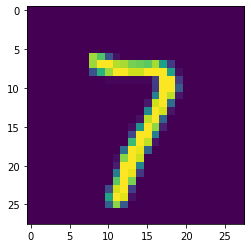

In [17]:
plt.imshow(X_train[loc])
plt.show()

In [18]:
# data 모양 바꾸기, 정규화
# Reshape(Flatten) and Normalization

X_train = X_train.reshape(train_size, train_nrow * train_ncol) / 255.0
X_test  = X_test.reshape(test_size, test_nrow * test_ncol) / 255.0

print(X_train.shape)

(60000, 784)


In [19]:
# 모델 구축

# Sequential model (perceptron 만들기)
model = tf.keras.models.Sequential() # 순차적으로 레이어를 더해준다. 

# Stacking layers(레이어 쌓기)
model.add(tf.keras.layers.Dense(units = 128,
                                activation = 'relu', # 활성화함수로 relu 함수 
                                input_shape = (train_nrow * train_ncol,)))  # hidden layer
model.add(tf.keras.layers.Dense(units = 10, 
                                activation = 'softmax'))  # ouput layer / 활성화함수로 softmax 함수
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [20]:
# 3. 모델 컴파일 (학습을 어떤방법으로 할 것인지 정하기)

model.compile(optimizer = 'sgd', # 최솟값으로 하산하는 방법(Stochastic gradient descent)
              loss = 'sparse_categorical_crossentropy', # 손실함수 정하기
              metrics = ['accuracy'])  # 평가지표

In [21]:
# 4. 모델 학습
# 초기 weight는 랜덤이다.

model.fit(X_train, y_train,  # 지도학습이다!
          epochs = 20,  # 몇 번 학습할래?
          verbose = 1,  # 학습되는 출력창 조절
          validation_split = 0.2) # 검증데이터로 20%만큼 사용

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.7104 - accuracy: 0.8253 - val_loss: 0.3813 - val_accuracy: 0.8967
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3631 - accuracy: 0.9001 - val_loss: 0.3093 - val_accuracy: 0.9130
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3106 - accuracy: 0.9134 - val_loss: 0.2770 - val_accuracy: 0.9218
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2796 - accuracy: 0.9213 - val_loss: 0.2570 - val_accuracy: 0.9274
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2562 - accuracy: 0.9283 - val_loss: 0.2363 - val_accuracy: 0.9337
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2369 - accuracy: 0.9340 - val_loss: 0.2243 - val_accuracy: 0.9373
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2210 - accuracy: 0.9376 - val_loss: 0.2099 - val_accuracy:

In [22]:
# 5. 모델 평가.

model.evaluate(X_test, y_test)
# test set에 대해서
# cross entropy 손실 값은 0.1266
# 정확도(accuracy)는 96.27% 이다 

313/313 [==============================] - 2s 5ms/step - loss: 0.1266 - accuracy: 0.9627


[0.12659849226474762, 0.9627000093460083]

79/79 [==============================] - 0s 2ms/step
모델이 예측한 정답 : 6
실제 정답 :  6


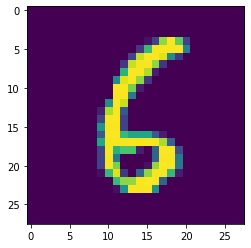

In [23]:
# 모델 예측

pred = model.predict(X_test, batch_size = 128)  #X_test 를 input하여 나온 y_pred

loc = int(np.random.randint(0, len(pred), 1))

print("모델이 예측한 정답 :", np.argmax(pred[loc])) # tensor의 축에서 가장 큰 value의 index를 반환
print("실제 정답 : ", y_test[loc])

plt.imshow(X_test[loc].reshape(test_nrow, test_ncol))
plt.show()

In [24]:
# confusion matrix(혼동행렬) 만들기
# 혼동행렬: 지도 학습으로 훈련된 분류 알고리즘의 성능을 시각화 할 수 있는 표

y_pred = np.array([np.argmax(pred[loc]) for loc in range(len(X_test))])
y_pred  # Image 데이터에 따른 모델이 예측한 정답

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [28]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred)
print(cf)

[[ 967    0    1    2    0    3    5    1    1    0]
 [   0 1120    3    1    0    1    4    1    5    0]
 [   4    2 1000    4    2    1    5    8    6    0]
 [   1    2   12  956    1   16    1   10    8    3]
 [   1    0    6    1  946    0    3    3    2   20]
 [   5    1    1   11    1  849   10    0   10    4]
 [   7    3    1    0    6    8  928    0    5    0]
 [   2    8   17    2    2    0    0  986    0   11]
 [   4    2    5    7    3    7    8    9  928    1]
 [   6    6    2   11   19    6    1    9    2  947]]


In [29]:
# accuracy 구하기

accuracy = np.diag(cf).sum() / len(y_test) # np.diag: 대각 행렬 함수 
print(accuracy)

0.9627


In [31]:
import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Mnist Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig = plt.figure(figsize=(10,8)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 15)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, fontsize = 15)
        plt.yticks(tick_marks, target_names, fontsize = 15)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black", fontsize = 15)
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black", fontsize = 10)

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 15)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize = 10)
    # plt.savefig("Mnist confusion matrix.png")
    plt.show()

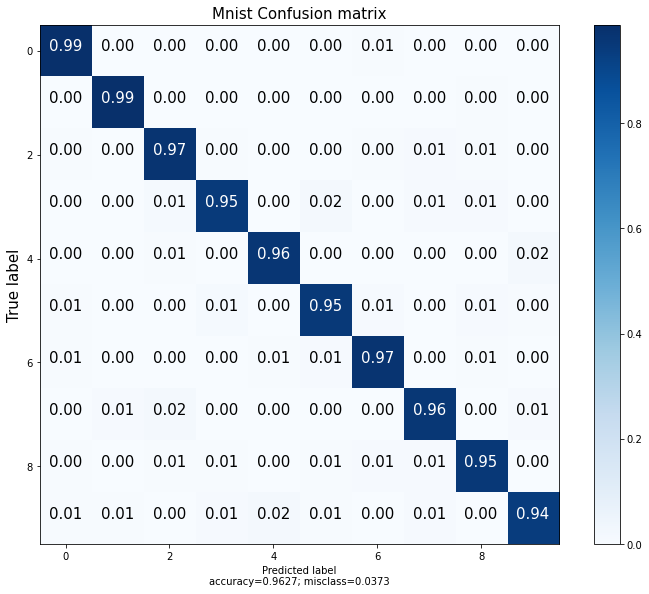

In [32]:
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM)